<a href="https://colab.research.google.com/github/TanyaBizina/test/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22VKR_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q hvplot
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install -q yfinance
!pip install -q keras
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q datetime
!pip install -q numpy
!pip install -q sklearn
!pip install -q tensorflow

     |████████████████████████████████| 3.1 MB 4.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
     |████████████████████████████████| 6.4 MB 6.4 MB/s 
     |████████████████████████████████| 62 kB 838 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Считывание биржевых данных с yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# Временные отметки
from datetime import datetime

In [ ]:
# Выбор акций
tech_list = ['GAZP.ME', 'YNDX.ME', 'RUAL.ME', 'SBER.ME']

# Начало и конец сбора данных
tech_list = ['GAZP.ME', 'YNDX.ME', 'RUAL.ME', 'SBER.ME']

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
GAZP = globals()['GAZP.ME']
YNDX = globals()['YNDX.ME']
RUAL = globals()['RUAL.ME']
SBER = globals()['SBER.ME']
company_list = [GAZP, YNDX, RUAL, SBER]
company_name = ["GAZP.ME", "YNDX.ME", "RUAL.ME", "SBER.M"]


for company, company_name in zip(company_list, tech_list):	
	df = pd.concat(company_list, axis=0)
	df.tail(10)

In [ ]:
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-04,158.979996,159.660004,157.600006,158.559998,93.757454,2324455
2012-07-05,158.759995,160.779999,156.899994,158.869995,93.940765,4936867
2012-07-06,157.000000,157.429993,155.009995,155.199997,91.770668,29858090
2012-07-09,155.410004,156.460007,153.809998,154.500000,91.356750,26274530
2012-07-10,154.009995,156.699997,152.770004,155.350006,91.859367,3165288
...,...,...,...,...,...,...
2022-05-19,125.309998,126.860001,123.209999,125.599998,125.599998,34246550
2022-05-20,125.599998,125.599998,125.599998,125.599998,125.599998,0
2022-05-23,125.599998,125.599998,125.599998,125.599998,125.599998,0


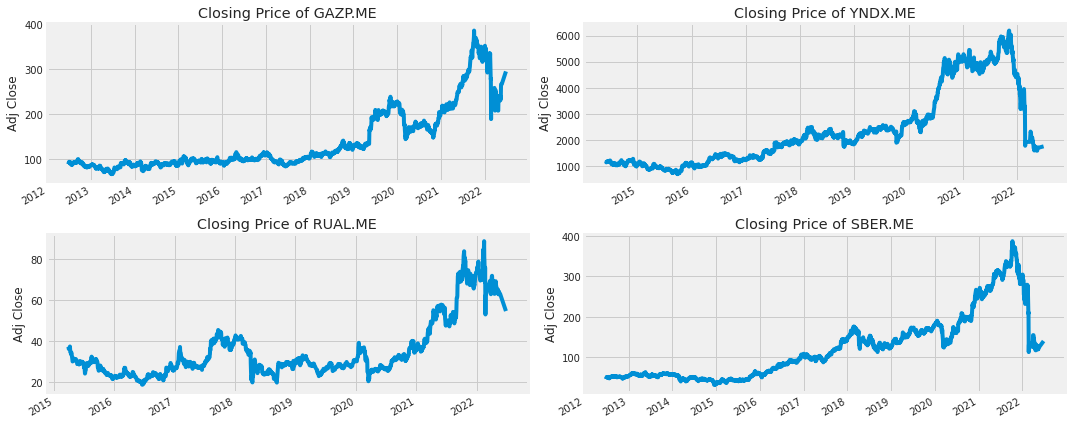

In [ ]:
# Обзор цен закрытия акций
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate (company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()


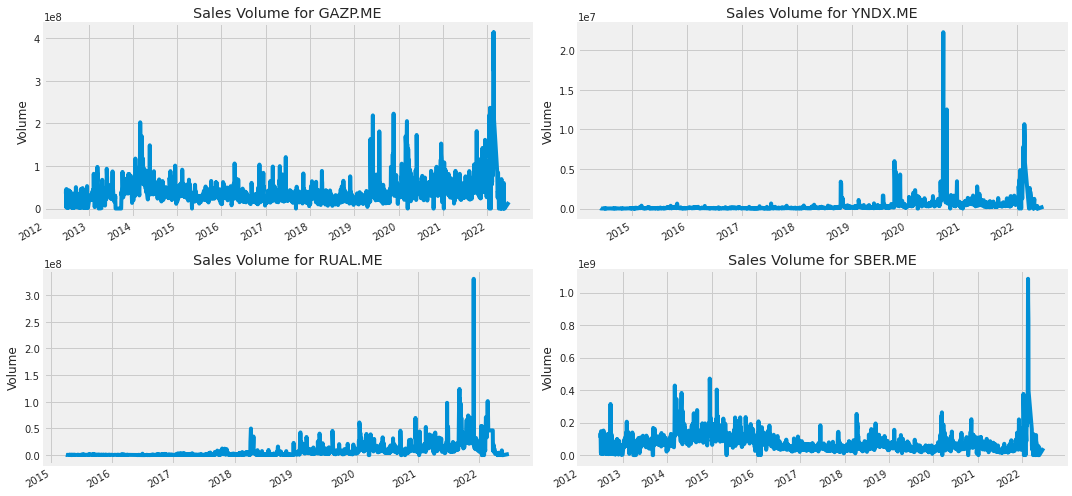

In [ ]:
# График общего объема акций, торгуемых каждый день
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
      

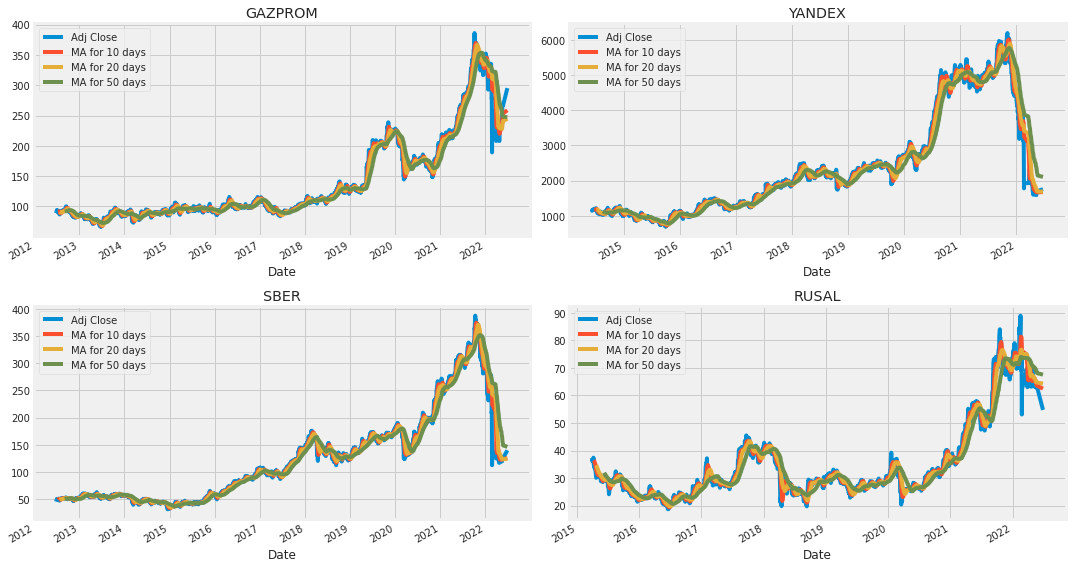

In [ ]:

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

GAZP[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('GAZPROM')

YNDX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('YANDEX')

SBER[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('SBER')

RUAL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('RUSAL')

fig.tight_layout()


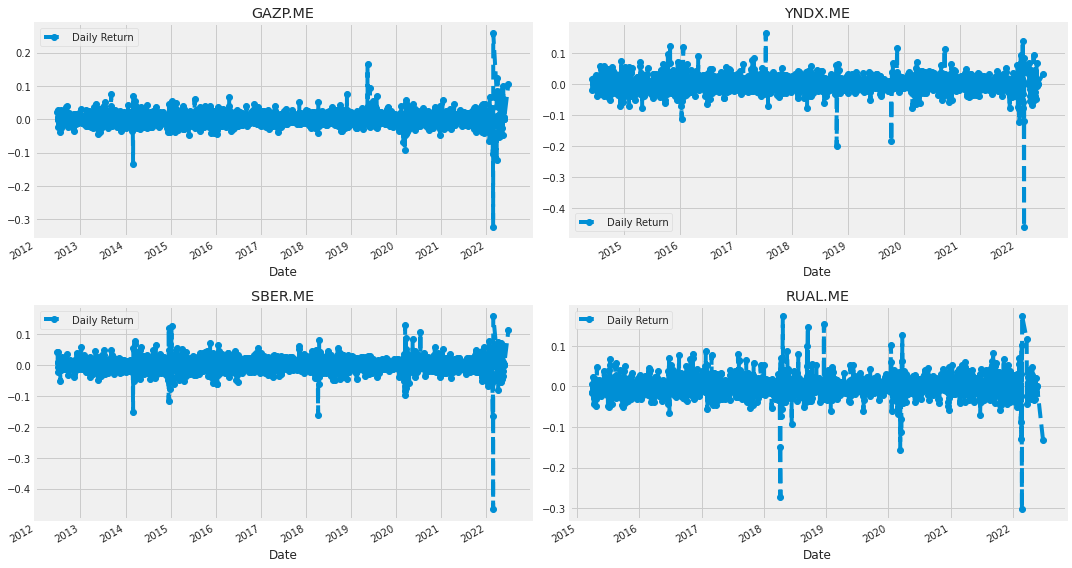

In [ ]:
# Процентное изменение за каждый день
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# График ежедневного процента доходности
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

GAZP['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('GAZP.ME')

YNDX['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('YNDX.ME')

SBER['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('SBER.ME')

RUAL['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('RUAL.ME')

fig.tight_layout()


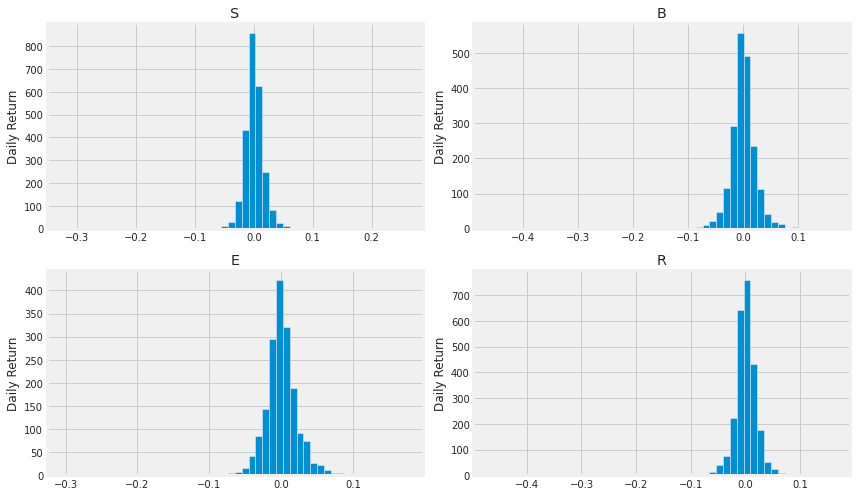

In [ ]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [ ]:
# Сбор цен закрытия акций в один датафрейм
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']


closing_df.head() 

Symbols,GAZP.ME,YNDX.ME,RUAL.ME,SBER.ME
Date,,,,
2012-06-28,89.021095,NaN,NaN,45.915504
2012-06-29,91.055199,NaN,NaN,47.923401
2012-07-02,91.528229,NaN,NaN,48.389328
2012-07-03,93.934845,NaN,NaN,50.402775
2012-07-04,93.757469,NaN,NaN,50.158718


In [ ]:

tech_rets = closing_df.pct_change()
tech_rets.head()


Symbols,GAZP.ME,YNDX.ME,RUAL.ME,SBER.ME
Date,,,,
2012-06-28,NaN,NaN,NaN,NaN
2012-06-29,0.022850,NaN,NaN,0.043730
2012-07-02,0.005195,NaN,NaN,0.009722
2012-07-03,0.026294,NaN,NaN,0.041609
2012-07-04,-0.001888,NaN,NaN,-0.004842


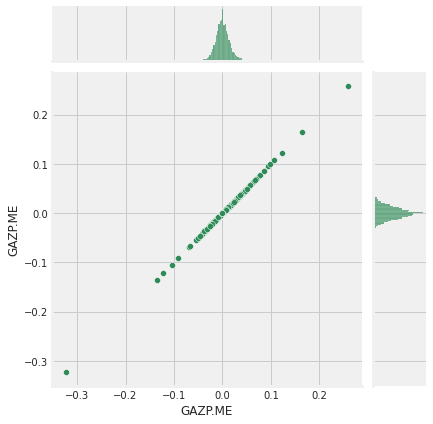

In [ ]:
# Линейная зависимость Газпром
sns.jointplot(x='GAZP.ME', y='GAZP.ME', data=tech_rets, kind='scatter', color='seagreen')

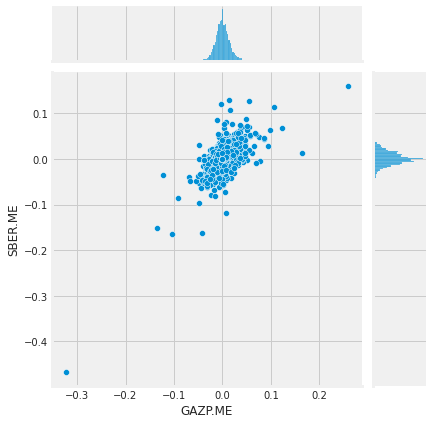

In [ ]:
# Сравнения ежедневных доходов Газпром и Сбер
sns.jointplot(x='GAZP.ME', y='SBER.ME', data=tech_rets, kind='scatter')

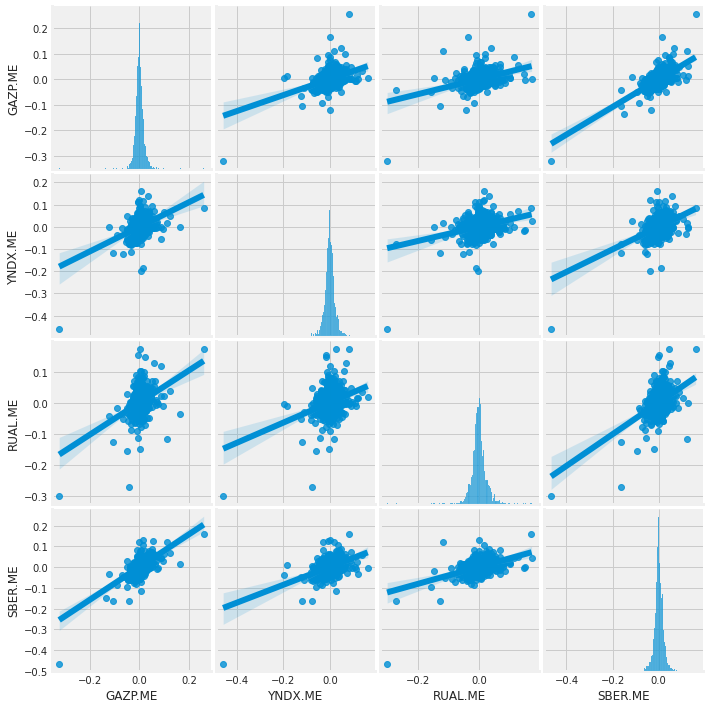

In [ ]:
# Автоматическая визуализация всех сравнений

sns.pairplot(tech_rets, kind='reg')

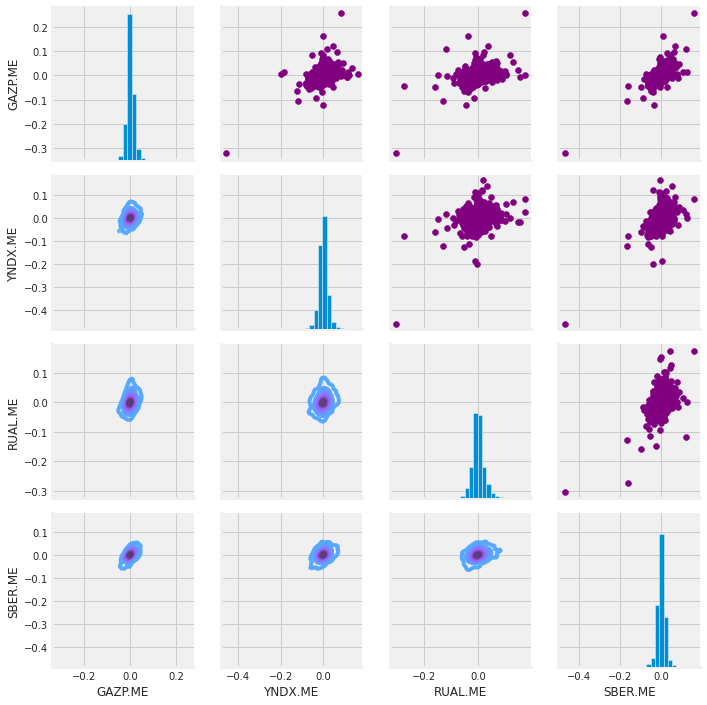

In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)


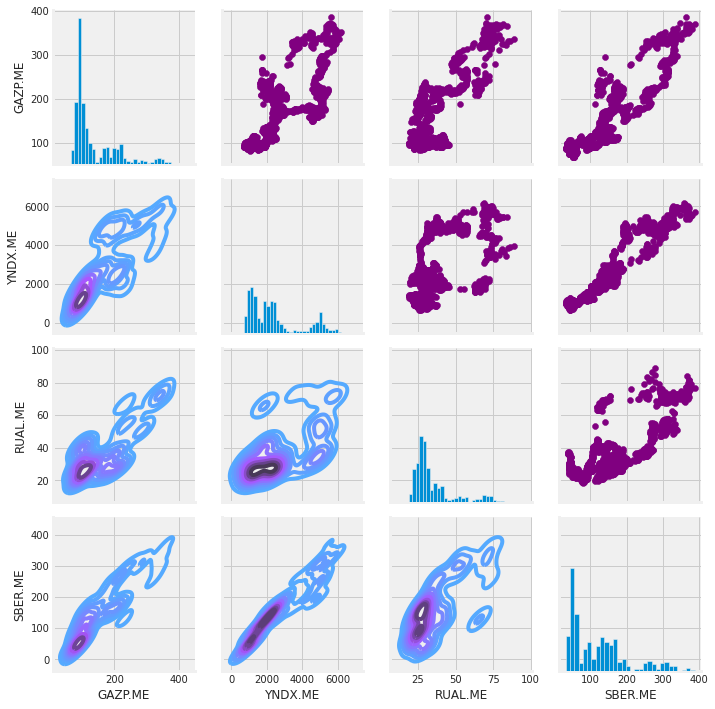

In [ ]:
# Настройка фигуры
returns_fig = sns.PairGrid (closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

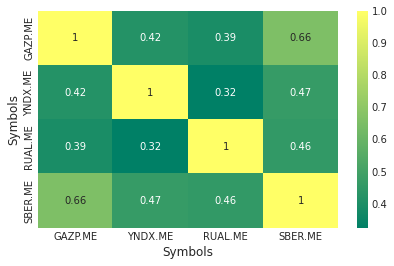

In [ ]:
# График корреляции ежегодной доходности
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

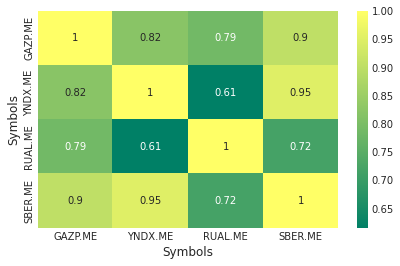

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

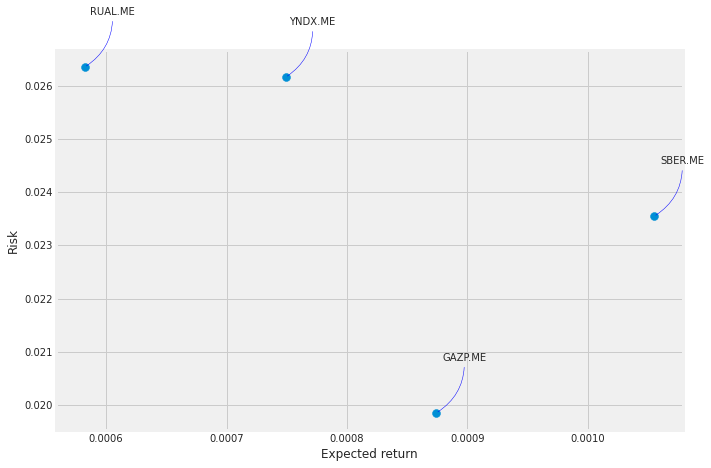

In [ ]:
# Сокращенный фрейм данных
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
                 


In [ ]:
# Получение данных для прогноза
df = DataReader('GAZP.ME', data_source='yahoo', start='2012-01-01', end=datetime.now())

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,171.360001,171.360001,171.360001,171.360001,0.0,90.549988
2012-01-04,171.360001,171.360001,171.360001,171.360001,0.0,90.549988
2012-01-05,171.360001,171.360001,171.360001,171.360001,0.0,90.549988
2012-01-06,171.360001,171.360001,171.360001,171.360001,0.0,90.549988
2012-01-10,179.610001,177.279999,177.279999,179.610001,254488320.0,94.909439
...,...,...,...,...,...,...
2022-05-19,269.779999,262.649994,268.000000,266.679993,24980910.0,266.679993
2022-05-20,266.679993,266.679993,266.679993,266.679993,0.0,266.679993
2022-05-23,266.679993,266.679993,266.679993,266.679993,0.0,266.679993


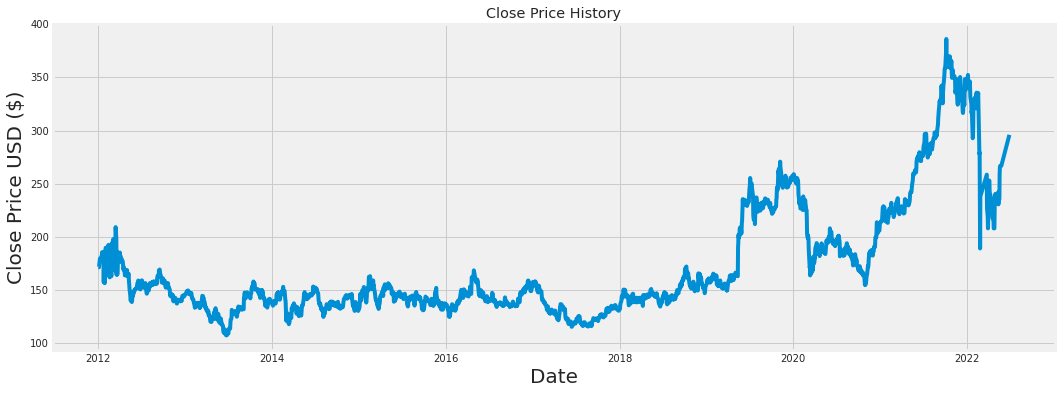

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.show()

In [ ]:
# Цена закрытия
data = df.filter(['Close'])

dataset = data.values
# Обучение модели
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2457

In [ ]:
# Масштабирование данных
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.22992256],
       [0.22992256],
       [0.22992256],
       ...,
       [0.57166928],
       [0.57166928],
       [0.67671739]])

In [ ]:
# Набор обучающих данных

train_data = scaled_data[0:int(training_data_len), :]
# Разделение данных x_train и y_train 
x_train = []
y_train = []

for i in range(120, len(train_data)):
    x_train.append(train_data[i-120:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 121:
        print(x_train)
        print(y_train)
        print()
        
# Преобразование в массив numpy
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.22992256, 0.22992256, 0.22992256, 0.22992256, 0.25950093,
       0.25408721, 0.25311918, 0.25674027, 0.25552129, 0.26735265,
       0.26771115, 0.2806181 , 0.27337586, 0.27645918, 0.27265882,
       0.28133514, 0.17966981, 0.24790979, 0.17637603, 0.27452317,
       0.2401782 , 0.28725084, 0.29567617, 0.29603471, 0.26129498,
       0.2923419 , 0.29241357, 0.29015489, 0.30155599, 0.30417326,
       0.30553562, 0.20203068, 0.29850855, 0.19606125, 0.30055212,
       0.29209091, 0.23795749, 0.19981823, 0.27604259, 0.30962282,
       0.30962282, 0.31363834, 0.31363834, 0.32514699, 0.3154668 ,
       0.32242221, 0.32242221, 0.21830417, 0.329772  , 0.36548294,
       0.3258282 , 0.20481142, 0.28248245, 0.28248245, 0.20549618,
       0.27595725, 0.27054353, 0.26419761, 0.25032268, 0.26358812,
       0.26735265, 0.2795784 , 0.26864335, 0.26871501, 0.26039725,
       0.26054063, 0.24763374, 0.24655815, 0.24584111, 0.25347767,
       0.24096516, 0.23200201, 0.22181989, 0.22916963, 0.2285

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# LSTM 
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(x_train, y_train, batch_size=1, epochs=1)

2337/2337 [==============================] - 160s 66ms/step - loss: 9.4534e-04


In [ ]:
# Тестовые данные
 
test_data = scaled_data[training_data_len - 120: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(120, len(test_data)):
    x_test.append(test_data[i-120:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


14.388642140356094

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


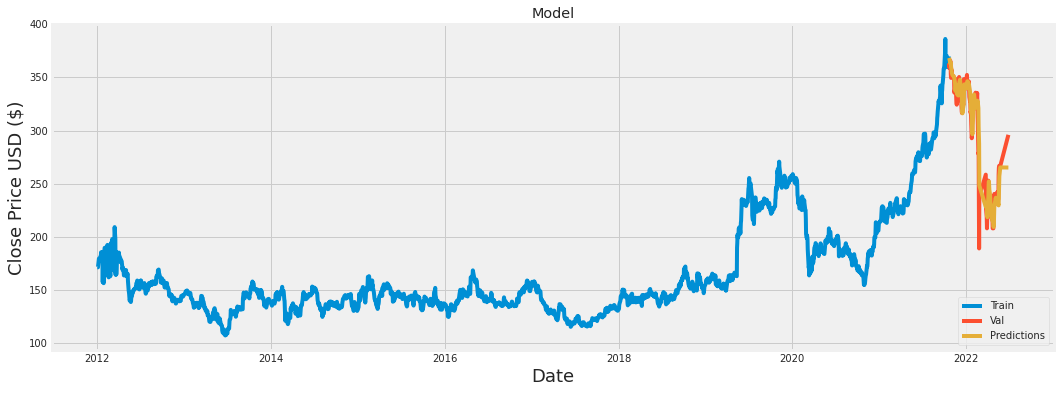

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Визуализация
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
# Действительные и прогнозные значения
valid

,Close,Predictions
Date,,
2021-10-21,363.309998,368.314392
2021-10-22,358.890015,367.679260
2021-10-25,363.959991,364.568085
2021-10-26,365.670013,363.190491
2021-10-27,364.100006,363.514374
...,...,...
2022-05-19,266.679993,247.679459
2022-05-20,266.679993,257.089447
2022-05-23,266.679993,262.960419
